In [1]:
from google.colab import drive
# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


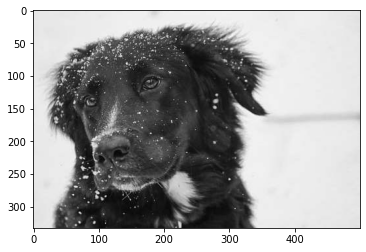

array([[230, 230, 230, ..., 227, 226, 226],
       [230, 230, 230, ..., 227, 226, 226],
       [230, 230, 230, ..., 227, 227, 226],
       ...,
       [229, 229, 229, ..., 226, 226, 226],
       [229, 229, 229, ..., 226, 226, 226],
       [229, 229, 229, ..., 225, 225, 225]], dtype=uint8)

In [22]:
import numpy as np
import cv2 as cv
from numpy import linalg as LA
from matplotlib import pyplot as plt

img_address = "drive/My Drive/dog.jpg"
img = cv.imread(img_address, 0)
# print(img)
# img = img[:,:,0]
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()
img

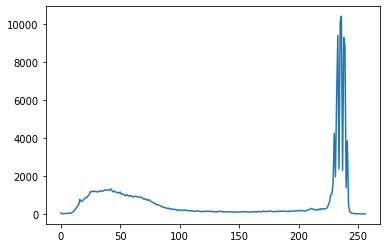

[[230 230 230 ... 227 226 226]
 [230 230 230 ... 227 226 226]
 [230 230 230 ... 227 227 226]
 ...
 [229 229 229 ... 226 226 226]
 [229 229 229 ... 226 226 226]
 [229 229 229 ... 225 225 225]]


In [23]:
def histogram(data):
  frequency = np.zeros(257)
  for i in range(len(data)):
    for j in range(len(data[0])):
      frequency[data[i][j]] += 1
  plt.plot(frequency)
  plt.show()
  return frequency

histo = histogram(img)
print(img)

In [24]:
import math

def parameters(fre):
  max = 0
  for i in range(0, len(fre)):
    if fre[i] > fre[max]:
      max = i
  medianB = max
  sigmaB = (medianB) / 3
  temp = medianB + (3 * sigmaB)
  if temp < 255 :
    max = 0
    for i in range(int(temp), len(fre)):
      if fre[i] > fre[max]:
        max = i
    medianO = max
    sigmaO = (medianO - temp) / 3
  else : 
    sigmaB = (256 - medianB) / 3
    temp = medianB - (3 * sigmaB)
    max = 0
    for i in range(0, int(temp)):
      if fre[i] > fre[max]:
        max = i
    medianO = max
    sigmaO = (temp - medianO) / 3
  AB = 1 / (math.sqrt(math.pi * 2) * sigmaO)
  AO = 1 / (math.sqrt(math.pi * 2) * sigmaB)
  tempO = AO * sigmaO
  tempB = AB * sigmaB
  teta = tempO / (tempO + tempB)
  return sigmaO, medianO, sigmaB, medianB, teta
  
sigmaO, medianO, sigmaB, medianB, teta = parameters(histo)
print("sigmaO, medianO, sigmaB, medianB, teta : ", sigmaO, medianO, sigmaB, medianB, teta)

sigmaO, medianO, sigmaB, medianB, teta :  58.0 42 6.666666666666667 236 0.9869604902855652


In [25]:
from sympy import *
def calculte_t(sigmaO, medianO, sigmaB, medianB, teta):
  x = symbols('x', real=True)
  eO = pow(math.e, -abs((x - medianO)/sigmaO))
  pO = (1 / (2 * sigmaO))* eO
  yek = teta * pO
  eB =  pow(math.e, -abs((x - medianB)/sigmaB))
  pB = (1 / (2 * sigmaB))* eB
  do = (1 - teta) * pB
  expr = -abs((x - medianO)/sigmaO) + abs((x - medianB)/sigmaB)
  t = solve(expr)
  return t

t = calculte_t(sigmaO, medianO, sigmaB, medianB, teta)
print(t)
for i in range(len(t)):
  if t[i] > 0:
    t = t[i]
    break
print("Threshold : ", t)

[216.000000000000, 261.194805194805]
Threshold :  216.000000000000


In [26]:
def calculte_t2(sigmaO, medianO, sigmaB, medianB, teta):
  minus = medianB - medianO
  sum = medianB + medianO
  t= (pow(sigmaO, 2)/minus) * np.log((1 - teta) / teta) - (sum / 2)
  return np.abs(t)

t2 = calculte_t2(sigmaO, medianO, sigmaB, medianB, teta)

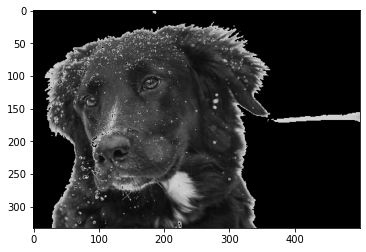

In [28]:
def object_detect(img, t):
  detected = np.array(img)
  for i in range(len(img)):
    for j in range(len(img[0])):
      detected[i, j] = 0 if detected[i,j] > t2 else detected[i, j]
  return detected

detected = object_detect(img, t)
plt.imshow(cv.cvtColor(detected, cv.COLOR_BGR2RGB))
plt.show()